# IMPORTING DATA 

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# VISUALIZATION OF THE DATASET  

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
# Creating training and testing array sets
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [8]:
training.shape

(60000, 785)

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

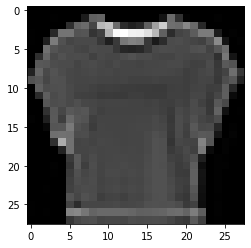

In [11]:
#picking random data from the dataset and plotting image
i = random.randint(1,60000) 
plt.imshow( training[i,1:].reshape((28,28)) ) 
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray')

In [12]:
label = training[i,0]
label


0.0

# VIEW IMAGE DATSET IN A GRID FORMAT

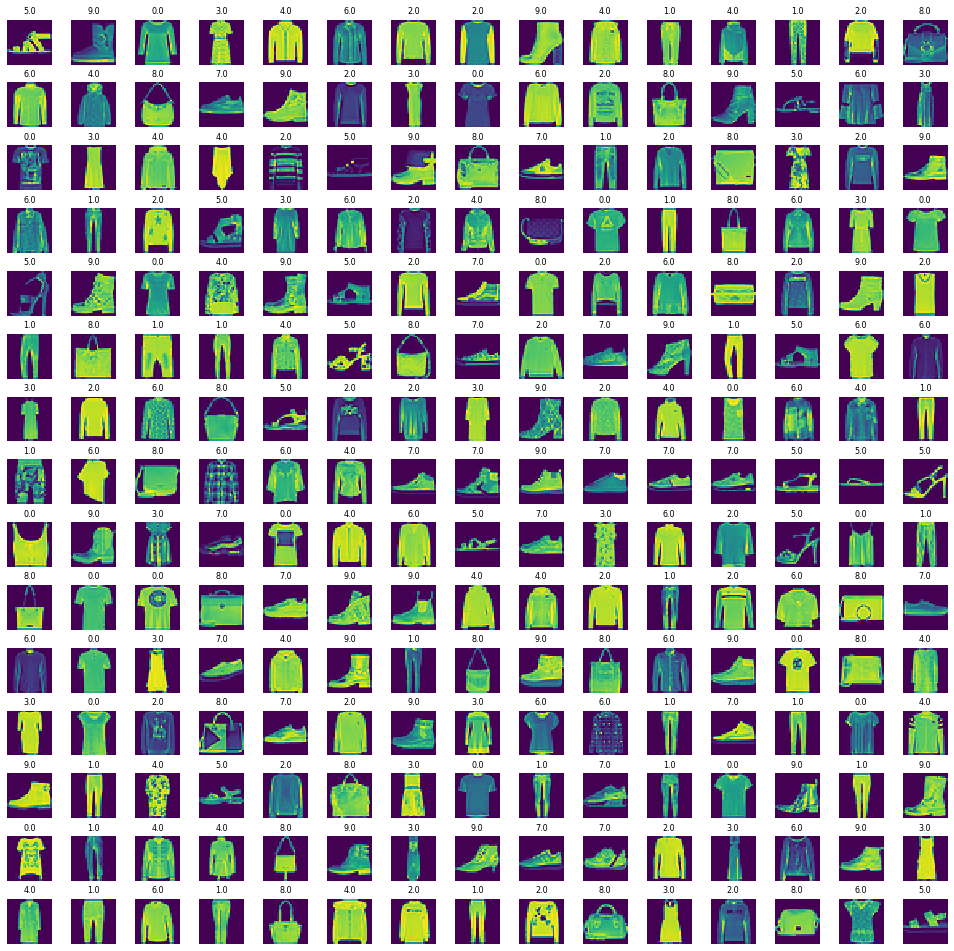

In [13]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() 
n_training = len(training)

for i in np.arange(0, W_grid * L_grid): 
    
    index = np.random.randint(0, n_training)
      
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

The 10 classes for each category is:
0 => T-shirt/top, 
1 => Trouser, 
2 => Pullover, 
3 => Dress, 
4 => Coat, 
5 => Sandal, 
6 => Shirt, 
7 => Sneaker, 
8 => Bag, 
9 => Ankle boot

# TRAINING THE MODEL

In [14]:
#Creating the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [16]:
X_train.shape

(48000, 784)

In [17]:
y_train.shape

(48000,)

In [18]:
#unpacking the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [19]:
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_validate.shape

(12000, 28, 28, 1)

In [22]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  # This is added back by InteractiveShellApp.init_path()


In [23]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [24]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Users\pcs\Anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.9581 - accuracy: 0.6469 - val_loss: 0.5416 - val_accuracy: 0.7978
Epoch 2/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.5055 - accuracy: 0.8203 - val_loss: 0.4417 - val_accuracy: 0.8428
Epoch 3/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.4400 - accuracy: 0.8449 - val_loss: 0.4171 - val_accuracy: 0.8541
Epoch 4/50
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4018 - accuracy: 0.8570 - val_loss: 0.3724 - val_accuracy: 0.8717
Epoch 5/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.3735 - accuracy: 0.8683 - val_loss: 0.3542 - val_accuracy: 0.8759
Epoch 6/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.3530 - accuracy: 0.8752 - val_loss: 0.3396 - val_accuracy: 0.8816
Epoch 7/50
48000/48000 [==============================] - 61s 1ms/st

# EVALUATING THE MODEL

In [25]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 310us/step
Test Accuracy : 0.915


In [26]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


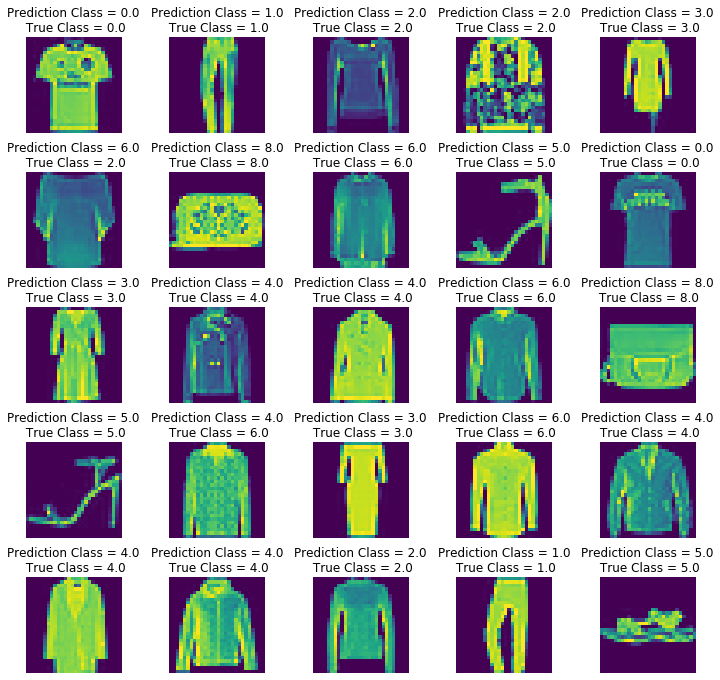

In [27]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


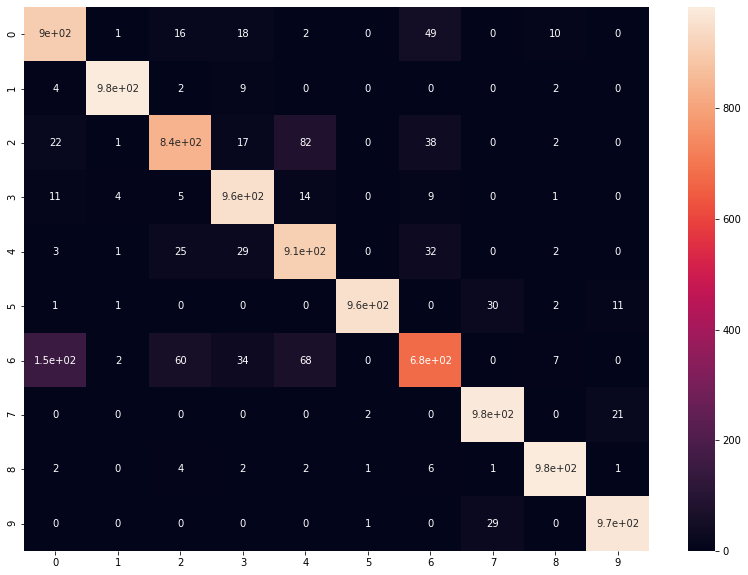

In [28]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [29]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.90      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.84      0.86      1000
     Class 3       0.90      0.96      0.93      1000
     Class 4       0.84      0.91      0.87      1000
     Class 5       1.00      0.95      0.97      1000
     Class 6       0.83      0.68      0.75      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

